In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
df = pd.read_csv('rankings.csv')
df = df.drop(columns = ['Highly Cited Papers (ESI)'])
# df = df[(df['Score'] < 70)]
df.head()

,Name,Country,Region,Papers,Books,Conference Proceedings,NCI (ESI),Research Power (ESI),# of top 10% documents (ESI),Percent Documents in Top 10% (ESI),Percent Highly Cited Papers (ESI),International Collaboration,International Collaboration (relative to country),Reputation (Global),Reputation (Local),Score,RANK,Year
0,Harvard University,United States of America,North America,1,3,118,12,1,1,6,5,484,68,1,6,100.0,1,2019
1,Massachusetts Institute of Technology (MIT),United States of America,North America,31,36,13,3,8,8,2,1,317,31,2,13,97.6,2,2019
2,Stanford University,United States of America,North America,9,24,46,7,3,2,5,3,557,114,3,10,93.8,3,2019
3,University of California Berkeley,United States of America,North America,19,12,43,13,12,10,9,14,428,54,5,14,90.8,4,2019
4,University of Oxford,United Kingdom,Europe,5,1,131,25,4,4,33,36,126,222,6,75,87.6,5,2019


In [3]:
X = df.drop(columns=['Score', 'Name', 'Country', 'Region', 'Year', 'RANK'])
y = df.Score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

R2 Score:  0.8807856366363904
MAE:  4.119365940322961


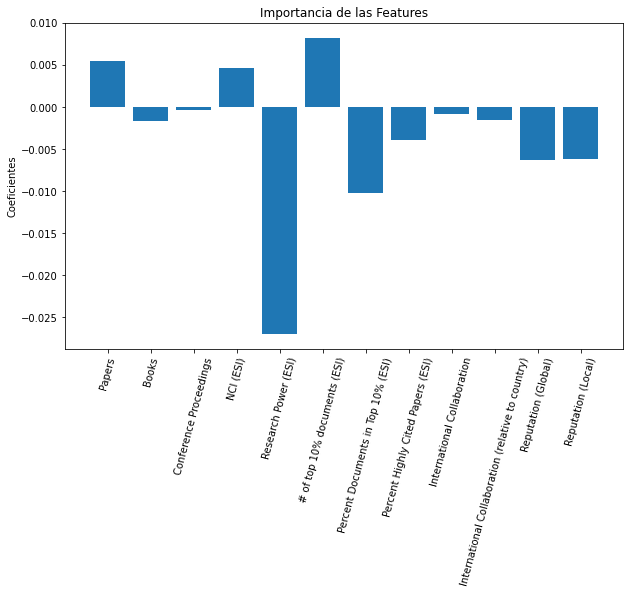

In [5]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_pred_lreg = lreg.predict(X_test) 
  
print("R2 Score: ", (r2_score(y_pred_lreg, y_test)))
print("MAE: ", MAE(y_test, y_pred_lreg))  

lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.DataFrame(lreg.coef_)
lreg_coefficient
plt.figure(figsize=(10,6))
plt.bar(lreg_coefficient.Columns, lreg_coefficient['Coefficient Estimate'])
plt.ylabel('Coeficientes')
plt.title('Importancia de las Features')
plt.xticks(rotation=75)
plt.show()


In [6]:
lreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [7]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svr = svm.SVR(kernel='rbf') # Linear Kernel

#Train the model using the training sets
svr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = svr.predict(X_test)

print("R2 Score: ", (r2_score(y_pred_svm, y_test)))
print("MAE: ", MAE(y_test, y_pred_svm))

svr_coefficient = pd.DataFrame() 
svr_coefficient["Columns"] = X_train.columns 
# svr_coefficient['Coefficient Estimate'] = pd.Series(svr.dual_coef_) 
print(svr_coefficient)

R2 Score:  0.9376355664241006
MAE:  2.96086237621212
                                              Columns
0                                              Papers
1                                               Books
2                              Conference Proceedings
3                                           NCI (ESI)
4                                Research Power (ESI)
5                        # of top 10% documents (ESI)
6                  Percent Documents in Top 10% (ESI)
7                   Percent Highly Cited Papers (ESI)
8                         International Collaboration
9   International Collaboration (relative to country)
10                                Reputation (Global)
11                                 Reputation (Local)


In [8]:
import xgboost as xgb
# Instantiation
xgb_r = xgb.XGBRegressor(learning_rate=0.3)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
y_pred_xgb = xgb_r.predict(X_test)
 
# RMSE Computation
print("R2 Score: ", (r2_score(y_pred_xgb, y_test)))
print("MAE: ", MAE(y_test, y_pred_xgb))

[23:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score:  0.9633081008394583
MAE:  2.37669070892334


In [9]:
print(max(abs(y_pred_xgb - y_test)))
print(max(abs(y_pred_svm - y_test)))
print(max(abs(y_pred_lreg - y_test)))

11.622064208984376
19.821204840425537
26.516303212405063


In [10]:
xgb_r.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

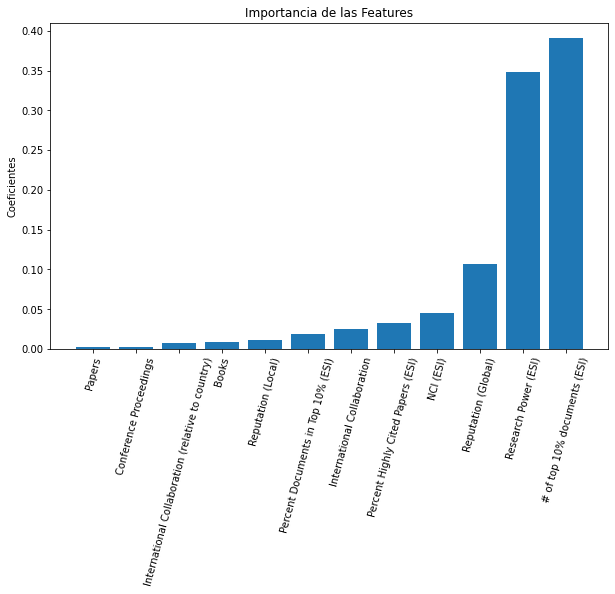

In [11]:
plt.figure(figsize=(10,6))
sorted_idx = xgb_r.feature_importances_.argsort()
plt.bar(X_test.columns[sorted_idx], xgb_r.feature_importances_[sorted_idx])
plt.xticks(rotation=75)
plt.ylabel('Coeficientes')
plt.title('Importancia de las Features')
plt.show()

In [12]:
for col,score in zip(X_train.columns, xgb_r.feature_importances_):
    print(col,score)

Papers 0.0019442945
Books 0.008772009
Conference Proceedings 0.0025574
NCI (ESI) 0.045446213
Research Power (ESI) 0.34832114
# of top 10% documents (ESI) 0.3904545
Percent Documents in Top 10% (ESI) 0.01824708
Percent Highly Cited Papers (ESI) 0.032960836
International Collaboration 0.025382165
International Collaboration (relative to country) 0.00765134
Reputation (Global) 0.10720265
Reputation (Local) 0.011060288


In [13]:
xgb_r.feature_importances_

array([0.00194429, 0.00877201, 0.0025574 , 0.04544621, 0.34832114,
       0.3904545 , 0.01824708, 0.03296084, 0.02538216, 0.00765134,
       0.10720265, 0.01106029], dtype=float32)

In [14]:
tec_pos = df[df['Name'] == 'Tecnologico de Monterrey']
tec_pos_x = tec_pos.drop(columns=['Name', 'Country', 'Region', 'RANK', 'Year', 'Score'])
tec_pos_y = tec_pos.Score

In [15]:
xgb_r.predict(tec_pos_x)

array([35.444283, 35.93799 , 36.85024 , 39.73677 ], dtype=float32)

In [16]:
tec_pos_y

898     32.8
2104    37.6
3592    40.6
5035    44.6
Name: Score, dtype: float64

In [17]:
predicciones_tec = pd.DataFrame(xgb_r.predict(tec_pos_x), columns = ['Predicted'])
predicciones_tec['Real'] = tec_pos_y.tolist()
predicciones_tec['Error'] = predicciones_tec['Predicted'] - predicciones_tec['Real']
predicciones_tec['Year'] = ['2018-2019', '2019-2020', '2020-2021', '2021-2022']
predicciones_tec = predicciones_tec.set_index('Year')
predicciones_tec

,Predicted,Real,Error
Year,,,
2018-2019,35.444283,32.8,2.644283
2019-2020,35.937988,37.6,-1.662012
2020-2021,36.850239,40.6,-3.749761
2021-2022,39.736771,44.6,-4.863229


In [18]:
prediccion_futuro = pd.DataFrame(columns = X_test.columns)
prediccion_futuro

,Papers,Books,Conference Proceedings,NCI (ESI),Research Power (ESI),# of top 10% documents (ESI),Percent Documents in Top 10% (ESI),Percent Highly Cited Papers (ESI),International Collaboration,International Collaboration (relative to country),Reputation (Global),Reputation (Local)


In [19]:
# from sklearn.inspection import permutation_importance
# perm_importance = permutation_importance(svr, X_test, y_test)
# feature_names = X_test.columns.tolist()

In [20]:
# feature_names = X_test.columns.tolist()
# features = np.array(feature_names)
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.title("Importancia de las Features SVR")
# plt.show()

In [21]:
a = [1028,763,592,1297,1105,1027,900,698,454,174,585,264]
a = np.array(a)
a = pd.DataFrame(a).transpose()
a.columns = X_test.columns
xgb_r.predict(a)


array([40.508556], dtype=float32)